### 6 ways to compute stock volatility

In [1]:
import math
import numpy as np
import yfinance as yf

In [2]:
aapl = yf.download("AAPL", start="2017-01-01", end="2022-12-03")

[*********************100%***********************]  1 of 1 completed


In [3]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.174757,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.144341,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.282379,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.586535,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.839201,134247600


<AxesSubplot:xlabel='Date'>

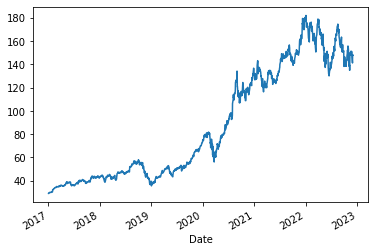

In [4]:
aapl['Close'].plot()

### Standard deviation measures how widely returns are dispersed from the average return.

In [7]:
def standard_deviation(price_data, window=30, trading_periods=252, clean=True):
    
    log_return = (price_data['Close'] / price_data['Close'].shift(1)).apply(np.log)
    result = log_return.rolling(window=window, center=False).std() * math.sqrt(trading_periods)
    
    if clean:
        return result.dropna()
    else:
        return result

<AxesSubplot:xlabel='Date'>

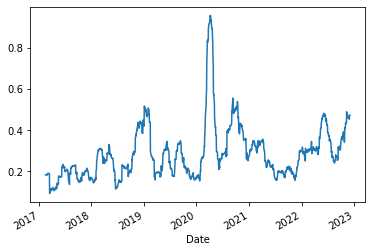

In [9]:
standard_deviation(aapl).plot()

### Parkinson Volatility 
#### Parkinson’s volatility uses the stock’s high and low price of the day rather than just close to close prices.

In [10]:
def parkinson(price_data, window=30, trading_periods=252, clean=True):
    rs = (1.0 / (4.0 * math.log(2.0))) * ((price_data['High'] / price_data['Low']).apply(np.log)) ** 2.0
    
    def f(v):
        return (trading_periods * v.mean()) ** 0.5
    
    result = rs.rolling(window=window, center=False).apply(func=f)
    
    if clean:
        return result.dropna()
    else:
        return result

<AxesSubplot:xlabel='Date'>

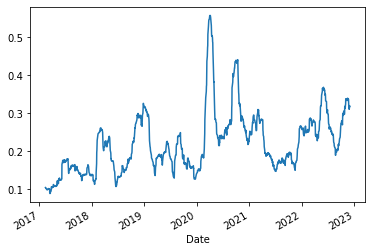

In [11]:
parkinson(aapl).plot()

### Garman-Klass
#### Garman-Klass volatility extends Parkinson’s volatility by taking into account the opening and closing price. As markets are most active during the opening and closing of a trading session, it makes volatility estimation more accurate.

In [29]:
def garman_klass(price_data, window=30, trading_periods=252, clean=True):
    log_hl = (price_data['High'] / price_data['Low']).apply(np.log)
    log_co = (price_data['Close'] / price_data['Open']).apply(np.log)
    
    rs = 0.5 * log_hl ** 2 - (2 * math.log(2) - 1) * log_co ** 2
    
    def f(v):
        return (trading_periods * v.mean()) ** 0.5
    
    result = rs.rolling(window=window, center=False).apply(func=f)
    
    if clean:
        return result.dropna()
    else:
        return result

<AxesSubplot:xlabel='Date'>

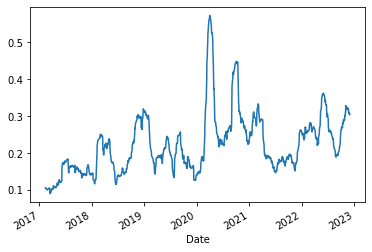

In [30]:
garman_klass(aapl).plot()

### Hodges-Tompkins
#### Hodges-Tompkins volatility is a bias correction for estimation using an overlapping data sample that produces unbiased estimates and a substantial gain in efficiency

In [31]:
def hodges_tompkins(price_data, window=30, trading_periods=252, clean=True):
    
    log_return = (price_data['Close'] / price_data['Close'].shift(1)).apply(np.log)
    
    vol = log_return.rolling(window=window, center=False).std() * math.sqrt(trading_periods)
    
    h = window
    n = (log_return.count() - h) + 1
    
    adj_factor = 1.0 / (1.0 - (h / n) + ((h ** 2 - 1) / (3 * n ** 2)))
    
    result = vol * adj_factor
    
    if clean:
        return result.dropna()
    else:
        return result

<AxesSubplot:xlabel='Date'>

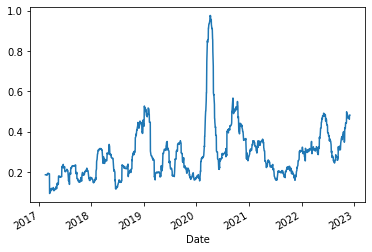

In [32]:
hodges_tompkins(aapl).plot()

### Rogers-Satchell
#### Rogers-Satchell is an estimator for measuring the volatility of securities with an average return not equal to zero. Unlike Parkinson and Garman-Klass estimators, Rogers-Satchell incorporates a drift term (mean return not equal to zero).

In [ ]:
def rogers_satchell(price_data, window=30, trading_periods=252, clean=True):
    
    log_ho = (price_data['High'] / price_data['Open']).apply(np.log)
    log_lo = (price_data['Low'] / price_data['Open']).apply(np.log)
    log_co = (price_data['Close'] / price_data['Open']).apply(np.log)
    
    rs = log_ho * (log_ho - log_co) + log_lo * (log_lo - log_co)
    
    def f(v):
        return (traing_periods * v.mean()) ** 0.5
    
    